# Lecture 2: Linear Regression

Loading the necessary libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('data/country-stats.csv')
data.head()

,Country Name,GDP per Capita (PPP USD),Population Density (persons per sq km),Population Growth Rate (%),Urban Population (%),Life Expectancy at Birth (avg years),Fertility Rate (births per woman),Infant Mortality (deaths per 1000 births),"Enrolment Rate, Tertiary (%)","Unemployment, Total (%)",Estimated Control of Corruption (scale -2.5 to 2.5),Estimated Government Effectiveness (scale -2.5 to 2.5),Internet Users (%)
0,Afghanistan,1560.67,44.62,2.44,23.86,60.07,5.39,71.0,3.33,8.5,-1.41,-1.40,5.45
1,Albania,9403.43,115.11,0.26,54.45,77.16,1.75,15.0,54.85,14.2,-0.72,-0.28,54.66
2,Algeria,8515.35,15.86,1.89,73.71,70.75,2.83,25.6,31.46,10.0,-0.54,-0.55,15.23
3,Antigua and Barbuda,19640.35,200.35,1.03,29.87,75.50,2.12,9.2,14.37,8.4,1.29,0.48,83.79
4,Argentina,12016.20,14.88,0.88,92.64,75.84,2.20,12.7,74.83,7.2,-0.49,-0.25,55.80


## Finding a Good Model

We can try a very basic model: $y=x$  
If $x$ and $y$ are very highly correlated and in the same range, then this can actually give a reasonable result.

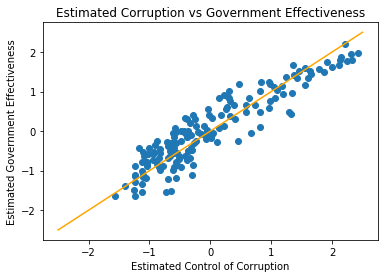

In [2]:
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Estimated Government Effectiveness (scale -2.5 to 2.5)"])
plt.title('Estimated Corruption vs Government Effectiveness')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Estimated Government Effectiveness")
x_sample = np.linspace(-2.5, 2.5, 100)
y = x_sample
plt.plot(x_sample, y, color='orange')
plt.show()

However, for most practical cases this is not true, with $x$ and $y$ varying along very different ranges.

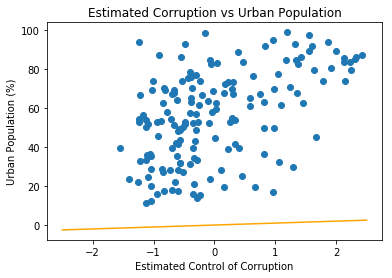

In [3]:
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")
x_sample = np.linspace(-2.5, 2.5, 100)
y = x_sample
plt.plot(x_sample, y, color='orange')
plt.show()

Let's try a slightly more flexible model: $y=ax$

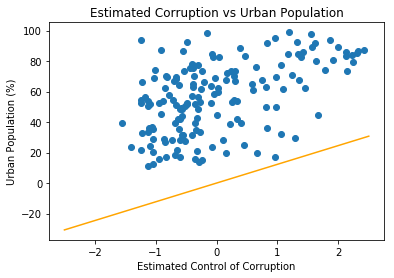

In [4]:
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")

model = LinearRegression(fit_intercept=False)
X = data["Estimated Control of Corruption (scale -2.5 to 2.5)"].values.reshape(-1,1)
Y = data["Urban Population (%)"]
model.fit(X, Y)

x_sample = np.linspace(-2.5, 2.5, 100)
plt.plot(x_sample, model.predict(x_sample.reshape(-1,1)), color='orange')
plt.show()

How about $y = b$

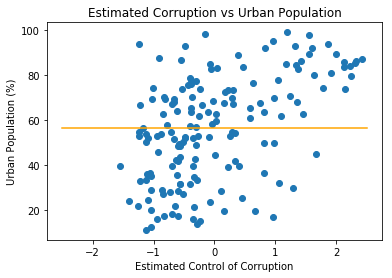

In [5]:
from sklearn.linear_model import LinearRegression
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")

model = LinearRegression(fit_intercept=True)
X = np.zeros((len(data["Urban Population (%)"]), 1), dtype=float)
Y = data["Urban Population (%)"]
model.fit(X, Y)

x_sample = np.linspace(-2.5, 2.5, 100)
plt.plot(x_sample, model.predict(x_sample.reshape(-1,1)), color='orange')
plt.show()

Putting these together, we get the simple linear regression model: $y = ax + b$

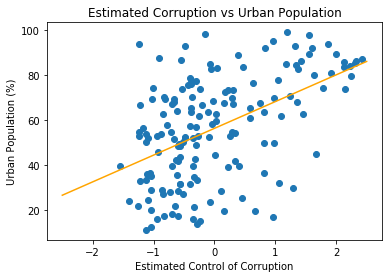

In [6]:
from sklearn.linear_model import LinearRegression
plt.scatter(data["Estimated Control of Corruption (scale -2.5 to 2.5)"], 
            data["Urban Population (%)"])
plt.title('Estimated Corruption vs Urban Population')
plt.xlabel("Estimated Control of Corruption")
plt.ylabel("Urban Population (%)")

model = LinearRegression(fit_intercept=True)
X = data["Estimated Control of Corruption (scale -2.5 to 2.5)"].values.reshape(-1,1)
Y = data["Urban Population (%)"]
model.fit(X, Y)

x_sample = np.linspace(-2.5, 2.5, 100)
plt.plot(x_sample, model.predict(x_sample.reshape(-1,1)), color='orange')
plt.show()

## Optimizing Linear Regression: Gradient Descent

Linear regression. Predicting enrolment rate from GDP

Let's define a helper function to visualise a line ($y = ax + b$) that has been fit to a dataset (X, Y)

In [7]:
def plot_simple_linear_regression(X, Y, a, b, title, xlabel, ylabel):
    plt.scatter(X, Y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    x_sample = np.linspace(np.min(X), np.max(X), 100)
    plt.plot(x_sample, x_sample*a + b, color='orange')
    plt.show()

A verbose version of gradient descent, iterating over epochs and each datapoint:

a: 0.0012	b: 0.000000055	RMSE: 43.6071
a: 0.0015	b: 0.000000079	RMSE: 27.7650
a: 0.0015	b: 0.000000098	RMSE: 27.1220
a: 0.0015	b: 0.000000116	RMSE: 27.1017
a: 0.0015	b: 0.000000133	RMSE: 27.1010
a: 0.0015	b: 0.000000150	RMSE: 27.1010
a: 0.0015	b: 0.000000168	RMSE: 27.1010
a: 0.0015	b: 0.000000185	RMSE: 27.1010
a: 0.0015	b: 0.000000202	RMSE: 27.1010
a: 0.0015	b: 0.000000220	RMSE: 27.1010


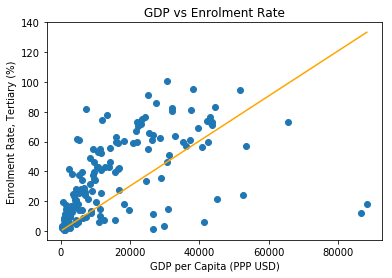

In [8]:
X = data["GDP per Capita (PPP USD)"].values
Y = data["Enrolment Rate, Tertiary (%)"].values

a = 0.0
b = 0.0
learning_rate = 1e-11


for epoch in range(10):
    update_a = 0.0
    update_b = 0.0
    error = 0.0
    for i in range(len(Y)):
        y_predicted = a * X[i] + b
        update_a += (y_predicted - Y[i])*X[i]
        update_b += (y_predicted - Y[i])
        error += np.square(y_predicted - Y[i])
    a = a - learning_rate * update_a
    b = b - learning_rate * update_b
    rmse = np.sqrt(error / len(Y))
    print("a: {:.4f}\tb: {:.9f}\tRMSE: {:.4f}".format(a, b, rmse))
plot_simple_linear_regression(X, Y, a, b, 
                              "GDP vs Enrolment Rate", 
                              "GDP per Capita (PPP USD)", 
                              "Enrolment Rate, Tertiary (%)")

A more compact version, using python vector operations:

RMSE: 43.60705215347087
RMSE: 27.76497473909167
RMSE: 27.12198023864696
RMSE: 27.10166490030484
RMSE: 27.10103054482276
RMSE: 27.101010737719818
RMSE: 27.10101011278586
RMSE: 27.10101008658616
RMSE: 27.101010079074786
RMSE: 27.101010072146735


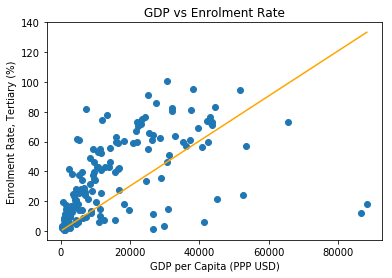

In [9]:
X = data["GDP per Capita (PPP USD)"].values
Y = data["Enrolment Rate, Tertiary (%)"].values

a = 0.0
b = 0.0
learning_rate = 1e-11

for epoch in range(10):
    y_predicted = a * X + b
    a = a - learning_rate * ((y_predicted - Y)*X).sum()
    b = b - learning_rate * (y_predicted - Y).sum()
    rmse = np.sqrt(np.square(y_predicted - Y).mean())
    print("RMSE: " + str(rmse))

plot_simple_linear_regression(X, Y, a, b, 
                              "GDP vs Enrolment Rate", 
                              "GDP per Capita (PPP USD)", 
                              "Enrolment Rate, Tertiary (%)")

## Optimizing Linear Regression: The Analytical Solution with Scikit-Learn

Using scikit-learn to calculate the analytical least squares solution:

RMSE: 22.630490998345973


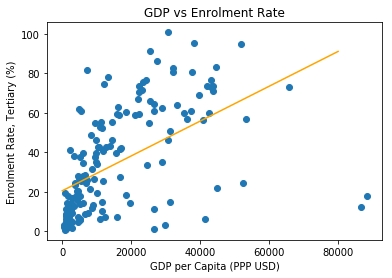

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
X = data["GDP per Capita (PPP USD)"].values.reshape(-1,1)
Y = data["Enrolment Rate, Tertiary (%)"]
model.fit(X, Y)

mse = np.square(Y - model.predict(X)).mean()
print("RMSE: " + str(np.sqrt(mse)))

plt.scatter(data["GDP per Capita (PPP USD)"], 
            data["Enrolment Rate, Tertiary (%)"])
plt.title('GDP vs Enrolment Rate')
plt.xlabel("GDP per Capita (PPP USD)")
plt.ylabel("Enrolment Rate, Tertiary (%)")

x_sample = np.linspace(0, 80000, 100)
plt.plot(x_sample, 
         model.predict(x_sample.reshape(-1,1)), 
         color='orange')
plt.show()

## Multiple Linear Regression

Predicting enrolment rate using all the available variables in the dataset.  
We have to exclude the country tame (because it's text and we can only handle numerical features at the moment) and enrolment rate itself (because using that would be cheating).

We can't really visualize an 11-dimensional graph, so we'll still project onto the same GDP vs Enrolment Rate graph, but the predictions will be made based on all 11 features.

RMSE: 14.401961816704741


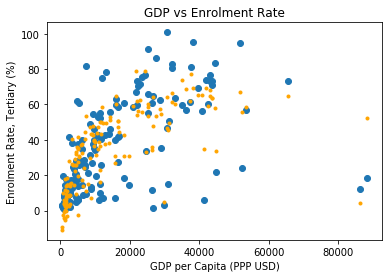

In [11]:
model = LinearRegression(fit_intercept=True)
X = data.copy().drop(["Country Name", "Enrolment Rate, Tertiary (%)"], axis=1)
Y = data["Enrolment Rate, Tertiary (%)"]

model.fit(X, Y)

mse = np.square(Y - model.predict(X)).mean()
print("RMSE: " + str(np.sqrt(mse)))

plt.scatter(data["GDP per Capita (PPP USD)"], 
            data["Enrolment Rate, Tertiary (%)"])
plt.title('GDP vs Enrolment Rate')
plt.xlabel("GDP per Capita (PPP USD)")
plt.ylabel("Enrolment Rate, Tertiary (%)")

x_pred = data["GDP per Capita (PPP USD)"]
plt.plot(x_pred, model.predict(X), '.', color='orange')
plt.show()

We can go in and inspect each of the learned coefficients in the model.

In [12]:
headers=list(X)
coefficients = []
for i in range(len(headers)):
    coefficients.append({"Property": headers[i], 
                         "coefficient": model.coef_[i]})
pd.DataFrame(coefficients)

,Property,coefficient
0,GDP per Capita (PPP USD),0.000236
1,Population Density (persons per sq km),-0.012085
2,Population Growth Rate (%),-12.605788
3,Urban Population (%),0.361150
4,Life Expectancy at Birth (avg years),0.584344
5,Fertility Rate (births per woman),5.795337
6,Infant Mortality (deaths per 1000 births),-0.092305
7,"Unemployment, Total (%)",-0.312737
8,Estimated Control of Corruption (scale -2.5 to...,-5.153427
9,Estimated Government Effectiveness (scale -2.5...,4.035069


While interesting, these values are not comparable, because the range of each of the input features is very different and this is reflected in the coefficients.  
We can standardize the input features before model fitting, which will make the coefficients comparable.

An example of applying standardization to features:

In [13]:
Z = pd.DataFrame(data, columns=["GDP per Capita (PPP USD)"])
Z_scaled = preprocessing.scale(Z)

asd = pd.concat([Z, pd.DataFrame(Z_scaled)], axis=1)
asd.columns = ["Z", "Z_scaled"]
asd.head()

,Z,Z_scaled
0,1560.67,-0.859361
1,9403.43,-0.379854
2,8515.35,-0.434152
3,19640.35,0.246031
4,12016.20,-0.220110


Now we can apply it to our features before fitting the model:

RMSE: 14.401961816704741


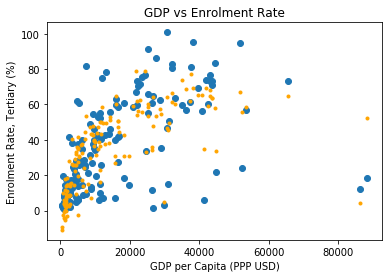

,Property,coefficient
0,GDP per Capita (PPP USD),3.865747
1,Population Density (persons per sq km),-2.748875
2,Population Growth Rate (%),-14.487085
3,Urban Population (%),8.359783
4,Life Expectancy at Birth (avg years),5.126343
5,Fertility Rate (births per woman),8.122616
6,Infant Mortality (deaths per 1000 births),-2.126688
7,"Unemployment, Total (%)",-2.385280
8,Estimated Control of Corruption (scale -2.5 to...,-5.023631
9,Estimated Government Effectiveness (scale -2.5...,3.714866


In [14]:
model = LinearRegression(fit_intercept=True)
X = data.copy().drop(["Country Name", "Enrolment Rate, Tertiary (%)"], axis=1)
X_scaled = preprocessing.scale(X)
Y = data["Enrolment Rate, Tertiary (%)"]
model.fit(X_scaled, Y)

mse = np.square(Y - model.predict(X_scaled)).mean()
print("RMSE: " + str(np.sqrt(mse)))

plt.scatter(data["GDP per Capita (PPP USD)"], 
            data["Enrolment Rate, Tertiary (%)"])
plt.title('GDP vs Enrolment Rate')
plt.xlabel("GDP per Capita (PPP USD)")
plt.ylabel("Enrolment Rate, Tertiary (%)")

x_pred = data["GDP per Capita (PPP USD)"]
plt.plot(x_pred, model.predict(X_scaled), '.', color='orange')
plt.show()

headers=list(X)
coefficients = []
for i in range(len(headers)):
    coefficients.append({"Property": headers[i], "coefficient": model.coef_[i]})
pd.DataFrame(coefficients)

## Polynomial Regression

We can take our existing input features and have them transformed into a series of polynomial features.  

With degree 2, features $[a, b]$ would become $[1, a, b, a^2, ab, b^2]$.  
Our original 11 features become 78 polynomial features that are able to capture pairwise feature interactions.

Polynomial regression is a special case of multiple linear regression - as a statistical estimation problem it is linear, but because it uses polynomial features it is able to model non-linear data.

RMSE: 13.669231419716226


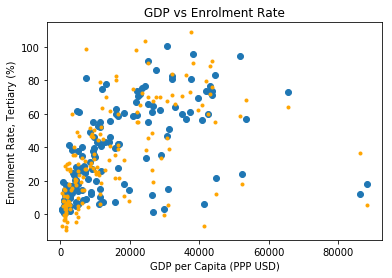

In [15]:
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression(fit_intercept=True)
X = data.copy().drop(["Country Name", "Enrolment Rate, Tertiary (%)"], axis=1)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
Y = data["Enrolment Rate, Tertiary (%)"]
model.fit(X_poly, Y)

mse = np.square(Y - model.predict(X_poly)).mean()
print("RMSE: " + str(np.sqrt(mse)))


plt.scatter(data["GDP per Capita (PPP USD)"], 
            data["Enrolment Rate, Tertiary (%)"])
plt.title('GDP vs Enrolment Rate')
plt.xlabel("GDP per Capita (PPP USD)")
plt.ylabel("Enrolment Rate, Tertiary (%)")

x_pred = data["GDP per Capita (PPP USD)"]
plt.plot(x_pred, model.predict(X_poly), '.', color='orange')


plt.show()

Now let's try 3rd degree polynomial features. Our original 11 features are transformed into 364 features.  
The resulting model captures the dataset almost perfectly.

RMSE: 0.00018355569998683386


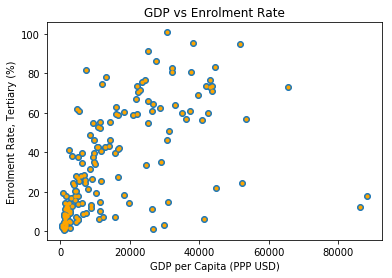

In [16]:
model = LinearRegression(fit_intercept=True)
X = data.copy().drop(["Country Name", "Enrolment Rate, Tertiary (%)"], axis=1)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
Y = data["Enrolment Rate, Tertiary (%)"]
model.fit(X_poly, Y)

mse = np.square(Y - model.predict(X_poly)).mean()
print("RMSE: " + str(np.sqrt(mse)))

plt.scatter(data["GDP per Capita (PPP USD)"], 
            data["Enrolment Rate, Tertiary (%)"])
plt.title('GDP vs Enrolment Rate')
plt.xlabel("GDP per Capita (PPP USD)")
plt.ylabel("Enrolment Rate, Tertiary (%)")

x_pred = data["GDP per Capita (PPP USD)"]
plt.plot(x_pred, model.predict(X_poly), '.', color='orange')
plt.show()

In fact, this model captures the dataset too perfectly.  
There are twice as many features for each datapoint as there are datapoints in the whole dataset. Such a model often has the capacity to memorize the training data, but that doesn't mean it is able to properly capture the underlying patterns.

## Dataset Splits for Model Selection

Let's try an experiment. We will split our available dataset into three parts: training, development and test set.  
We can fit the model on the **training** data, validate its performance and select model hyperparameters using the **development** data, and then finally evaluate the model using the **test** data.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=1)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8, random_state=1)

print(X.shape)
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(161, 11)
(102, 11)
(26, 11)
(33, 11)


We can define a function for fitting polynomial regression with different degrees:

In [18]:
def fit_polynomial_regression(X, Y, degree):
    model = LinearRegression(fit_intercept=True)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, Y)
    return model

Let's define one more function, to help us evaluate and plot the output from trained polynomial models:

In [19]:
def plot_gdp_vs_enrolment_rate(X, Y, degree, model):
    plt.scatter(X["GDP per Capita (PPP USD)"], Y)
    plt.title('GDP vs Enrolment Rate')
    plt.xlabel("GDP per Capita (PPP USD)")
    plt.ylabel("Enrolment Rate, Tertiary (%)")
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    mse = np.square(Y - model.predict(X_poly)).mean()
    print("RMSE: " + str(np.sqrt(mse)))
    
    x_pred = X["GDP per Capita (PPP USD)"]
    plt.plot(x_pred, model.predict(X_poly), '.', color='orange')

    plt.show()

First, let's try training the 3rd degree polynomial model on the training set and testing also on the training set:

RMSE: 1.1421935451839626e-07


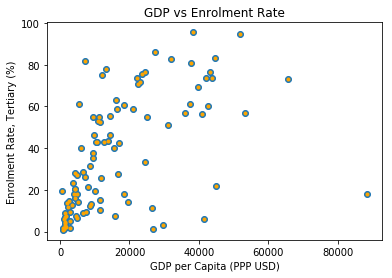

In [20]:
model = fit_polynomial_regression(X_train, y_train, degree=3)
plot_gdp_vs_enrolment_rate(X_train, y_train, degree=3, model=model)

Looks good, still a perfect fit.  

How about fitting the same model on the training set and the evaluating on the development set:

RMSE: 133.41368812237795


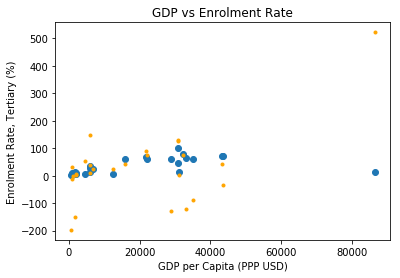

In [21]:
model = fit_polynomial_regression(X_train, y_train, degree=3)
plot_gdp_vs_enrolment_rate(X_dev, y_dev, degree=3, model=model)

Well that's no good. The predictions are all over the place.  
This model perfectly memorizes the training set but is not able to predict anything correctly on the development set. This might be a sign of overfitting. Let's try a lower-order model.

RMSE: 68.41227513962386


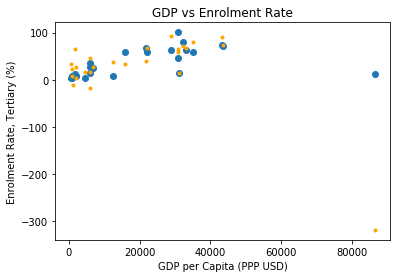

In [22]:
model = fit_polynomial_regression(X_train, y_train, degree=2)
plot_gdp_vs_enrolment_rate(X_dev, y_dev, degree=2, model=model)

Actually better. Now let's go all the way down to the first degree model.

RMSE: 16.141363115379


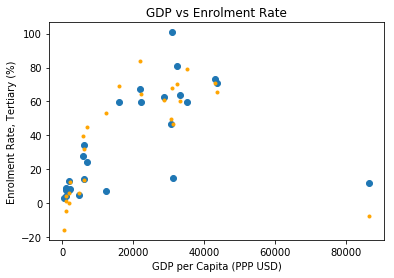

In [23]:
model = fit_polynomial_regression(X_train, y_train, degree=1)
plot_gdp_vs_enrolment_rate(X_dev, y_dev, degree=1, model=model)

And this is indeed the model that gives the smallest error on held-out data.

If we had a much larger dataset, with thousands or tens of thousands of examples, then the model wouldn't be able to overfit to the training set so easily and the polynomial features might actually provide a benefit.

Also, when we have much fewer features available, the polynomial model can help model the correct shape in the data. We can try polynomial regression with only one variable again: the GDP.

RMSE: 19.81304515794858


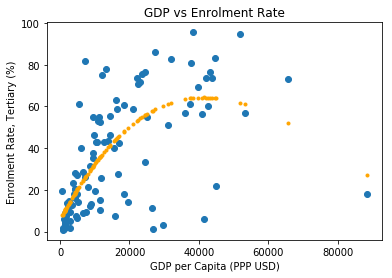

RMSE: 15.98345387426378


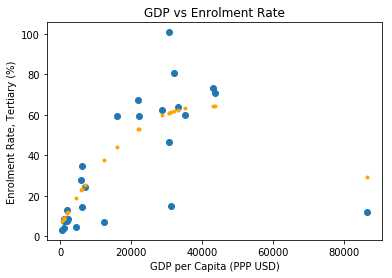

In [24]:
X_single = pd.DataFrame(data, columns=["GDP per Capita (PPP USD)"])
Y_single = data["Enrolment Rate, Tertiary (%)"]

X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, Y_single, test_size=0.2, train_size=0.8, random_state=1)
X_train_single, X_dev_single, y_train_single, y_dev_single = train_test_split(X_train_single, y_train_single, test_size=0.2, train_size=0.8, random_state=1)

model = fit_polynomial_regression(X_train_single.values.reshape(-1,1), y_train_single, degree=3)
plot_gdp_vs_enrolment_rate(X_train_single, y_train_single, degree=3, model=model)
plot_gdp_vs_enrolment_rate(X_dev_single, y_dev_single, degree=3, model=model)

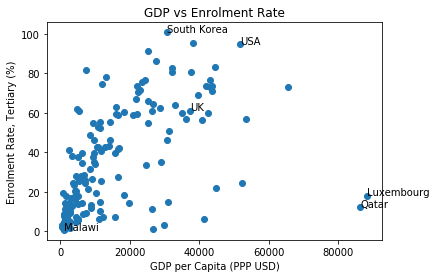

In [25]:
plt.scatter(data["GDP per Capita (PPP USD)"], 
            data["Enrolment Rate, Tertiary (%)"])
plt.title('GDP vs Enrolment Rate')
plt.xlabel("GDP per Capita (PPP USD)")
plt.ylabel("Enrolment Rate, Tertiary (%)")

countries = list(data["Country Name"])
for c in ["UK", "USA", "South Korea", "Luxembourg", "Qatar", "Malawi"]:
    country_num = countries.index(c)
    plt.annotate(countries[country_num], (data["GDP per Capita (PPP USD)"][country_num], data["Enrolment Rate, Tertiary (%)"][country_num]))

plt.show()

Tertiary education numbers can be checked here: http://wdi.worldbank.org/table/2.8